# Trying different Algorithm for Sentiment analysis

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from collections import Counter

In [56]:
import os
os.chdir('/home/paperspace/fastai/courses/dl1/')

In [57]:
df_train = pd.read_csv('./data/datamining/train.csv')
df_test = pd.read_csv('./data/datamining/test.csv')

In [58]:
print(df_train.shape[0])
df_train.head()

10387


,id,text,airline,tweet_location,user_timezone,sentiment
0,0,@JetBlue great flight! Great view! :-) http://...,Delta,NaN,NaN,positive
1,1,"@united they're not, actually. gate agent was ...",United,chicago,NaN,negative
2,2,@AmericanAir No worries they called back 4 hrs...,American,"Dallas, Texas",NaN,negative
3,3,@united thank you. There was one here a few mo...,United,"New York, NY",America/New_York,positive
4,4,@united Brothers luggage was lost on Copa Airl...,United,"Kearney, Nebraska",Central Time (US & Canada),negative


In [59]:
df_train['text'][0]

'@JetBlue great flight! Great view! :-) http://t.co/Yxn00pnOav'

In [60]:
print(df_test.shape[0])
df_test.head()

1372


,id,text,airline,tweet_location,user_timezone
0,0,@USAirways if one with @AmericanAir why can't ...,US Airways,NaN,NaN
1,1,@VirginAmerica You'd think paying an extra $10...,Virgin America,San Diego,Alaska
2,2,"@united according to your DMs, I'm not owed a ...",United,Nottingham,London
3,3,"@USAirways booked an award ticket recently, no...",US Airways,USA,Eastern Time (US & Canada)
4,4,@JetBlue Awesome! #bestairlineever,Delta,NYC,Quito


In [61]:
vectorizer = CountVectorizer(stop_words='english')
train_features = vectorizer.fit_transform([r for r in df_train['text']])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(train_features, 
                 df_train['sentiment'].values,        
                 test_size=0.2)

# Data Exploration

In [63]:
# Find mean length of sentences in data
(df_train['text'].apply(len)).mean()

108.42331760854916

In [64]:
# Find minimum length of sentences in data
(df_train['text'].apply(len)).min()

12

In [65]:
# Find maximum length of sentences in data
(df_train['text'].apply(len)).max()

229

In [41]:
list_word = Counter(" ".join(df_train["text"].str.lower()).split()).most_common()

In [42]:
# most common words
list_word[0:10]

[('to', 6243),
 ('the', 4524),
 ('i', 3752),
 ('a', 3282),
 ('for', 3025),
 ('and', 2924),
 ('@united', 2776),
 ('on', 2692),
 ('you', 2672),
 ('my', 2460)]

In [45]:
# least common words
list(reversed(list_word))[0:10]

[('car???', 1),
 ('peeled', 1),
 ('bailey???', 1),
 ('barnum', 1),
 ('ringling', 1),
 ('http://t.co/hi6fl1ax9e', 1),
 ('fleetâ\x80\x99s', 1),
 ('3574.', 1),
 ('464', 1),
 ('deplorable', 1)]

In [48]:
## Regular expression
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

def tweet_cleaner(text):
    tok = WordPunctTokenizer()
    remove_mention = r'@[A-Za-z0-9]+'
    remove_http = r'https?://[A-Za-z0-9./]+'
    combined= r'|'.join((remove_mention, remove_http))
    stripped = re.sub(combined, '', text)
    # Replace all unregconise characters
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # Join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [49]:
# Clean data
clean_text = []
for i in df_train['text']:
    clean_text.append(tweet_cleaner(i))

In [50]:
df_train['text'] = clean_text

In [51]:
list_word = Counter(" ".join(df_train["text"].str.lower()).split()).most_common()
list(reversed(list_word))[0:10]

[('peeled', 1),
 ('bailey', 1),
 ('barnum', 1),
 ('ringling', 1),
 ('unrivalled', 1),
 ('proceeded', 1),
 ('z', 1),
 ('mitchell', 1),
 ('yow', 1),
 ('mysteriously', 1)]

In [70]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

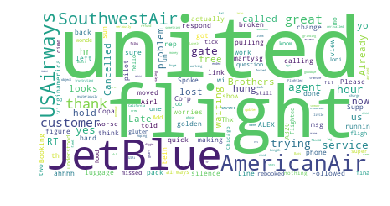

In [77]:
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100              
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=100, 
                          random_state=42
                         ).generate(str(df_train['text']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=100)

## Logistis Regression

Cross Validation: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 <br>

In [9]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
print("Logistic Regression classification rate:", LR.score(X_test, y_test))

Logistic Regression classification rate: 0.9128970163618865


In [10]:
scores = cross_val_score(LR, X_train, y_train, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.91706731 0.91826923 0.90625    0.92057762 0.92057762 0.91696751
 0.9        0.91686747 0.91566265 0.92048193]


In [11]:
predictions = LR.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1582   57]
 [ 124  315]]
             precision    recall  f1-score   support

   negative       0.93      0.97      0.95      1639
   positive       0.85      0.72      0.78       439

avg / total       0.91      0.91      0.91      2078



## Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB

In [13]:
NB = MultinomialNB()
NB.fit(X_train, y_train)
print("Naive Bayes classification rate:", NB.score(X_test, y_test))

Naive Bayes classification rate: 0.8946102021174206


In [14]:
scores = cross_val_score(NB, X_train, y_train, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.89182692 0.89182692 0.88942308 0.89530686 0.89290012 0.90613718
 0.87951807 0.88554217 0.88915663 0.89036145]


In [15]:
predictions = NB.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1565   74]
 [ 145  294]]
             precision    recall  f1-score   support

   negative       0.92      0.95      0.93      1639
   positive       0.80      0.67      0.73       439

avg / total       0.89      0.89      0.89      2078



## Decision Tree

In [16]:
from sklearn import tree

In [17]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
print("Decision Tree classification rate:", DT.score(X_test, y_test))

Decision Tree classification rate: 0.8599615014436959


In [18]:
scores = cross_val_score(DT, X_train, y_train, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.86658654 0.84495192 0.86538462 0.86883273 0.86642599 0.87123947
 0.85301205 0.85783133 0.84337349 0.87108434]


In [19]:
predictions = DT.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1512  127]
 [ 164  275]]
             precision    recall  f1-score   support

   negative       0.90      0.92      0.91      1639
   positive       0.68      0.63      0.65       439

avg / total       0.86      0.86      0.86      2078



## Neural Network 

In [20]:
from sklearn.neural_network import MLPClassifier

In [21]:
mlp = MLPClassifier(hidden_layer_sizes=(30,60,40),max_iter=500)
mlp.fit(X_train,y_train)
print("Neural Network classification rate:", mlp.score(X_test, y_test))

Neural Network classification rate: 0.8999037536092397


In [22]:
scores = cross_val_score(mlp, X_train, y_train, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.91105769 0.90384615 0.90024038 0.90132371 0.89891697 0.9133574
 0.90963855 0.89277108 0.8939759  0.91325301]


In [23]:
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1541   98]
 [ 110  329]]
             precision    recall  f1-score   support

   negative       0.93      0.94      0.94      1639
   positive       0.77      0.75      0.76       439

avg / total       0.90      0.90      0.90      2078



## Support Vector Machine

In [24]:
from sklearn.svm import SVC

In [25]:
svm = SVC()
svm.fit(X_train, y_train)
print("Support Vector Machine classification rate:", svm.score(X_test, y_test))

Support Vector Machine classification rate: 0.7887391722810395


In [42]:
scores = cross_val_score(svm, X_train, y_train, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.62713311 0.62713311 0.62713311 0.62766866 0.62766866 0.62766866
 0.62766866 0.62766866 0.62766866 0.62820513]


In [26]:
predictions = svm.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1639    0]
 [ 439    0]]
             precision    recall  f1-score   support

   negative       0.79      1.00      0.88      1639
   positive       0.00      0.00      0.00       439

avg / total       0.62      0.79      0.70      2078



/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Using Bigger data

In [27]:
df_train = pd.read_csv('./data/datamining/Tweets.csv')

In [28]:
df_train = df_train.rename(columns={'airline_sentiment':'sentiment'})

In [29]:
vectorizer = CountVectorizer(stop_words='english')
train_features = vectorizer.fit_transform([r for r in df_train['text']])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(train_features, 
                 df_train['sentiment'].values,        
                 test_size=0.2)

In [31]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
print("Logistic Regression classification rate:", LR.score(X_test, y_test))

Logistic Regression classification rate: 0.7814207650273224


In [32]:
scores = cross_val_score(LR, X_train, y_train, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.80119454 0.78242321 0.77901024 0.79248506 0.78992314 0.77882152
 0.7822374  0.78394535 0.77028181 0.79487179]


In [33]:
# Logistic Regression
predictions = LR.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1647  122   59]
 [ 232  318   66]
 [ 100   61  323]]
             precision    recall  f1-score   support

   negative       0.83      0.90      0.87      1828
    neutral       0.63      0.52      0.57       616
   positive       0.72      0.67      0.69       484

avg / total       0.77      0.78      0.77      2928



In [34]:
# Bayesian
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)
print("Naive Bayes classification rate:", NB.score(X_test, y_test))

Naive Bayes classification rate: 0.762636612021858


In [35]:
scores = cross_val_score(NB, X_train, y_train, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.76023891 0.73805461 0.75255973 0.73441503 0.75064048 0.74039283
 0.75405636 0.75405636 0.74295474 0.76239316]


In [36]:
predictions = NB.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1711   78   39]
 [ 305  253   58]
 [ 165   50  269]]
             precision    recall  f1-score   support

   negative       0.78      0.94      0.85      1828
    neutral       0.66      0.41      0.51       616
   positive       0.73      0.56      0.63       484

avg / total       0.75      0.76      0.74      2928



In [37]:
# Decision Tree
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
print("Decision Tree classification rate:", DT.score(X_test, y_test))

Decision Tree classification rate: 0.655396174863388


In [38]:
scores = cross_val_score(DT, X_train, y_train, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.68174061 0.65187713 0.66040956 0.67976089 0.66097353 0.66865927
 0.67719898 0.67719898 0.65841161 0.67948718]


In [39]:
predictions = DT.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1344  359  125]
 [ 235  300   81]
 [ 118   91  275]]
             precision    recall  f1-score   support

   negative       0.79      0.74      0.76      1828
    neutral       0.40      0.49      0.44       616
   positive       0.57      0.57      0.57       484

avg / total       0.67      0.66      0.66      2928



In [40]:
# Neural Network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20),max_iter=500)
mlp.fit(X_train,y_train)
print("Neural Network classification rate:", DT.score(X_test, y_test))

Neural Network classification rate: 0.655396174863388


In [41]:
predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1577  184   67]
 [ 243  305   68]
 [ 132   69  283]]
             precision    recall  f1-score   support

   negative       0.81      0.86      0.83      1828
    neutral       0.55      0.50      0.52       616
   positive       0.68      0.58      0.63       484

avg / total       0.73      0.74      0.73      2928

